# Mplchart Tests

In [66]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, Peaks, Price
from mplchart.indicators import SMA, EMA, WMA, HMA, ROC, RSI, MACD, DMI, STOCH, TSF, ALMA, BBANDS, KELTNER


In [67]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 00:00:00-05:00 to 2024-12-31 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [68]:
prices.rename(columns=str.lower)[["high", "low", "close"]].mean(axis=1)



Date
2020-01-02 00:00:00-05:00     72.399348
2020-01-03 00:00:00-05:00     72.267642
2020-01-06 00:00:00-05:00     72.106069
2020-01-07 00:00:00-05:00     72.450239
2020-01-08 00:00:00-05:00     73.098175
                                ...    
2024-12-24 00:00:00-05:00    257.233332
2024-12-26 00:00:00-05:00    258.916667
2024-12-27 00:00:00-05:00    255.783335
2024-12-30 00:00:00-05:00    252.149999
2024-12-31 00:00:00-05:00    251.043330
Length: 1258, dtype: float64

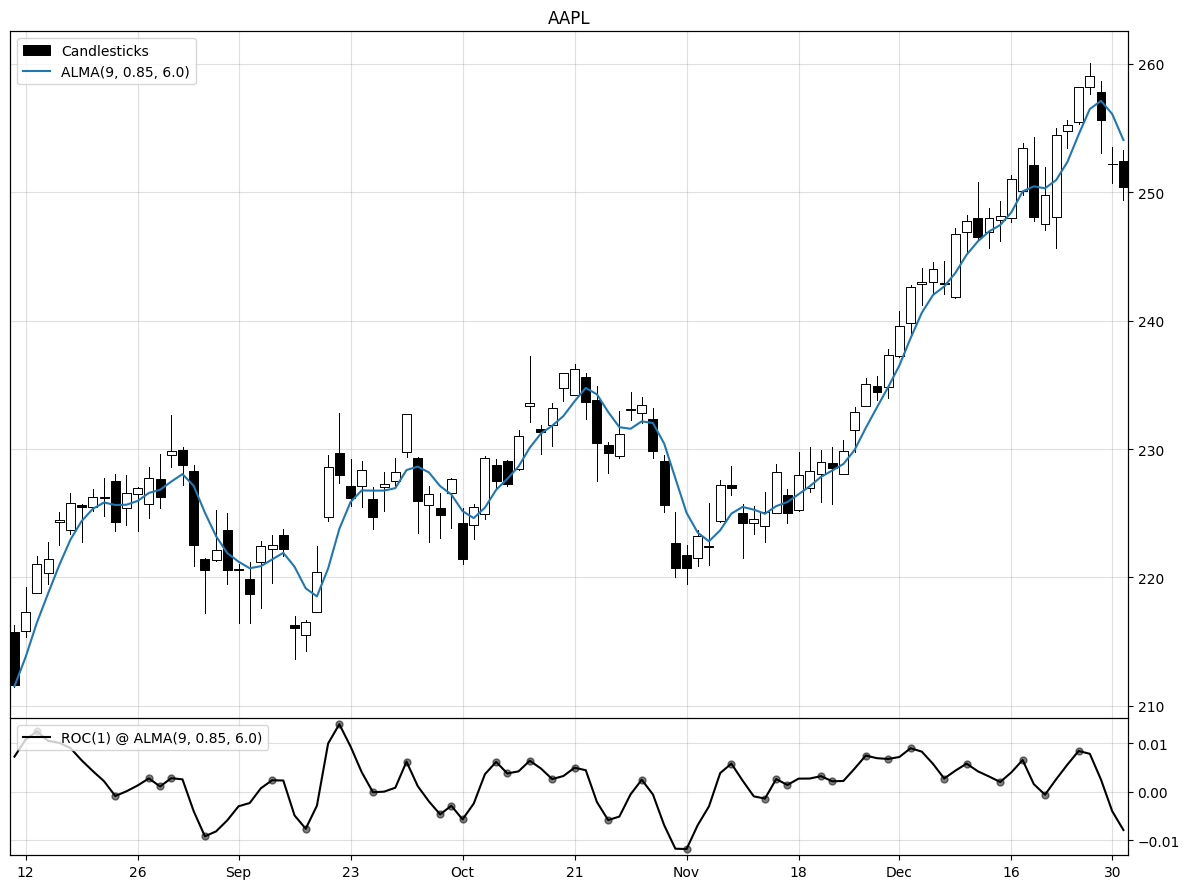

In [69]:


max_bars = 100

indicators = [
    Candlesticks(),
    ALMA(),
    ROC(1) @ ALMA(),
    Peaks(1)
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

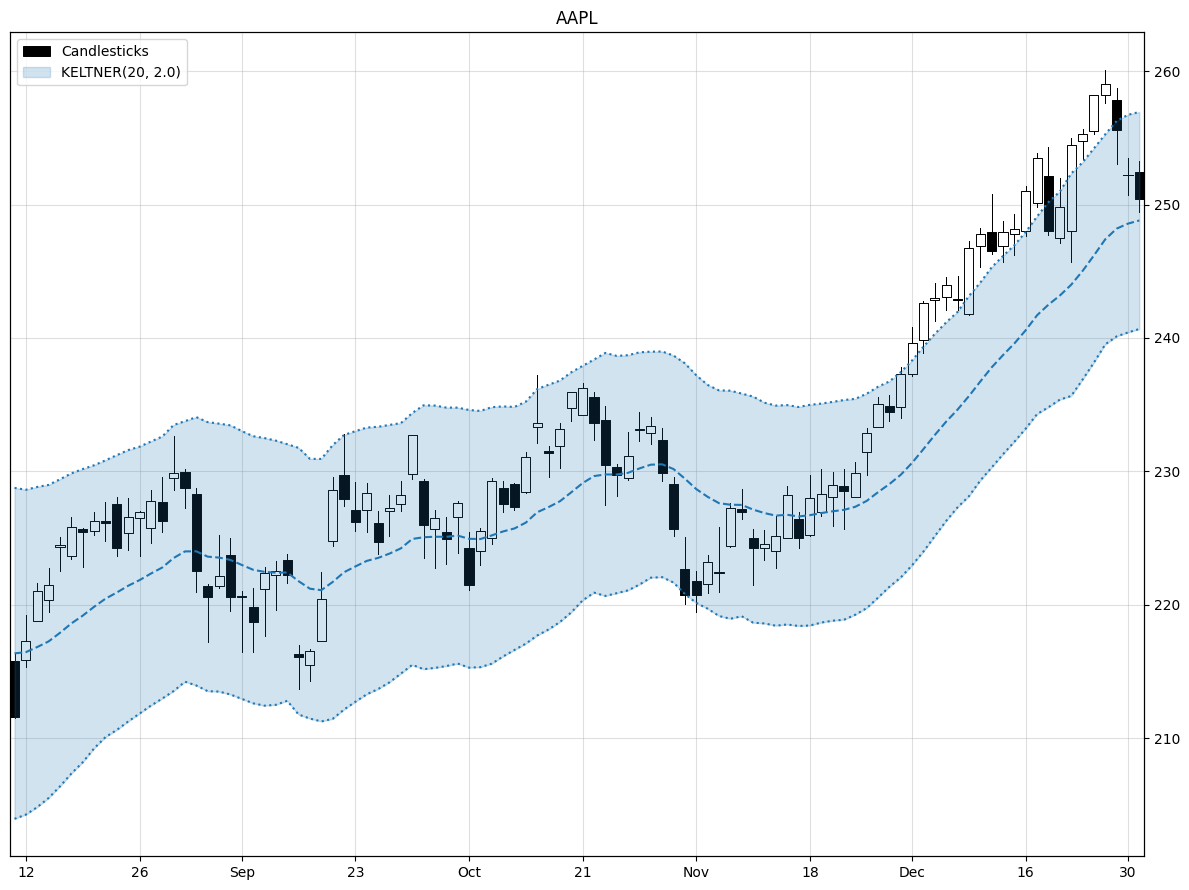

In [70]:
max_bars = 100

indicators = [
    Candlesticks(),
    KELTNER()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

In [72]:
KELTNER() @ Price() @ prices.rename(columns=str.lower)

TypeError: 'Price' object is not subscriptable